#Paquetes necesarios

In [10]:
import cv2
import pytesseract
import glob
import os
import matplotlib.pyplot as plt
import shutil

Primeras pruebas 

['eng', 'equ', 'osd', 'spa', 'spa_old']


YOLOR  v0.1-115-g072f76c torch 1.13.0 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191.5MB)

Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
c:\Users\rauln\anaconda3\envs\yolov7\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Namespace(weights=['C:\\Users\\rauln\\anaconda3\\envs\\yolov7\\yolov7.pt'], source='images\\IMG20221103140737.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='0', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 person, 5 cars, Done. (13.0ms) Inference, (4.0ms) NMS
 The image with the result is saved in: runs\detect\exp\IMG20221103140737.jpg
Done. (1.136s)


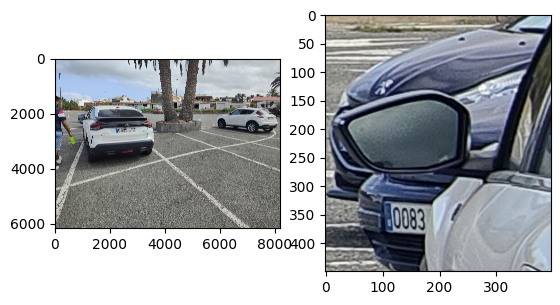

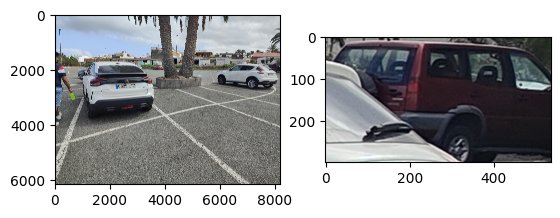

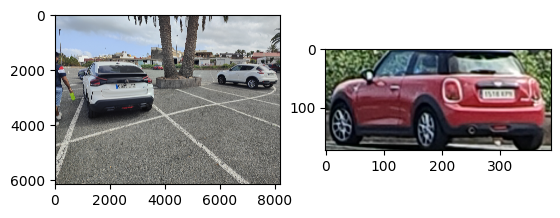

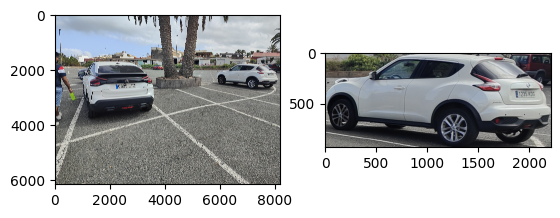

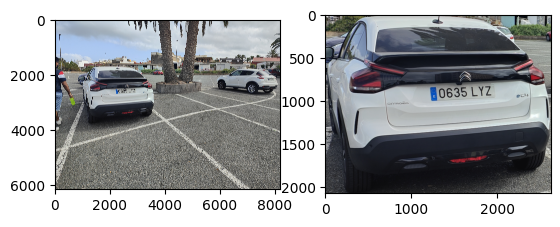

In [13]:
# Si la ruta de Tesseract no está en el PATH, ruta al ejecutable
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

# Lenguajes disponibles
print(pytesseract.get_languages(config=''))

#Cargo imagen y ocnvierto a RGB
img = cv2.imread('images\IMG20221103140737.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

shutil.rmtree('runs/', ignore_errors=True)

#Aplica reconocedor a imagen cargada
#print(pytesseract.image_to_string(img_rgb))

!python C:\Users\rauln\anaconda3\envs\yolov7\detect.py --weights C:\Users\rauln\anaconda3\envs\yolov7\yolov7.pt --conf 0.5 --source images\IMG20221103140737.jpg --save-txt --device 0

list_of_files = glob.glob('runs\detect\*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
file_name = latest_file + "\labels\*"
files = glob.glob(file_name)

# removing the new line characters
with open(files[0]) as f:
    lines = [line.rstrip() for line in f]
  
for line in lines:
    coordinates = line.split()
    if int(coordinates[0]) != 2:
        continue
    H, W, _ = img.shape
    object = [int(float(coordinates[1])*W), int(float(coordinates[2])*H), int(float(coordinates[3])*W), int(float(coordinates[4])*H)]   
    x,y,w,h = object
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.subplot(1,2,2)
    plt.imshow(img_rgb[y-h//2:y+h//2, x-w//2:x+w//2])
    plt.show()